# Load the data

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(len(train_data), len(test_data))

Using TensorFlow backend.


8982 2246


In [2]:
print(type(train_data), train_data[0])

<class 'numpy.ndarray'> [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [3]:
word_to_idx = reuters.get_word_index()
idx_to_word = dict([(idx, word) for (word, idx) in word_to_idx.items()])
decoded = ' '.join([idx_to_word.get(i - 3, '?') for i in train_data[0]])
print(decoded)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


# Preprocessing the data

In [4]:
import numpy as np

def vectorize(seqs, dimension=10000):
    results = np.zeros((len(seqs), dimension))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1.
    return results

In [5]:
# The principle being used in the above function to set specific cells to 1
a = np.zeros((3,3))
print(a)
a[1, [0, 2]] = 1
print('\n', a)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]

 [[ 0.  0.  0.]
 [ 1.  0.  1.]
 [ 0.  0.  0.]]


In [6]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [7]:
from keras.utils.np_utils import to_categorical

# Convert to one-hot encoding
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [43]:
print(y_train[100], train_labels[100])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 20


# Build the network

If the labels have not been converted to one-hot encoding, then use sparse_categorical_crossentropy. It is mathematically the same, except instead working with a matrix of target values, it works with a vector of target values.

An activation of softmax means that it outputs a probability distribution of the different classes. This means that the individual elements in the output vector will be between 0 and 1, and all of them will add up to 1.

In [8]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Explore performance

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 0s - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3435 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 0s - loss: 1.0929 - acc: 0.7661 - val_loss: 1.1704 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 0s - loss: 0.8682 - acc: 0.8166 - val_loss: 1.0788 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 0s - loss: 0.7020 - acc: 0.8483 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 0s - loss: 0.5666 - acc: 0.8796 - val_loss: 0.9401 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 0s - loss: 0.4592 - acc: 0.9039 - val_loss: 0.9090 - val_acc: 0.8010
Epoch 8/20
7982/7982 [==============================] - 0s - loss: 0.3704 - a

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(history):
    # Plot the loss over epochs

    train_accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(train_accuracy) + 1)

    plt.figure(figsize=(18,5))

    fig1 = plt.subplot(121)
    fig1.plot(epochs, train_loss, 'g', label='Training loss')
    fig1.plot(epochs, val_loss, 'r', label='Validation loss')
    fig1.set_title('Loss')
    fig1.set_xlabel('Epochs')
    fig1.set_ylabel('Loss')
    fig1.legend()

    fig2 = plt.subplot(122)
    fig2.plot(epochs, train_accuracy, 'g', label='Training accuracy')
    fig2.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    fig2.set_title('Accuracy')
    fig2.set_xlabel('Epochs')
    fig2.set_ylabel('Accuracy')
    fig2.legend()

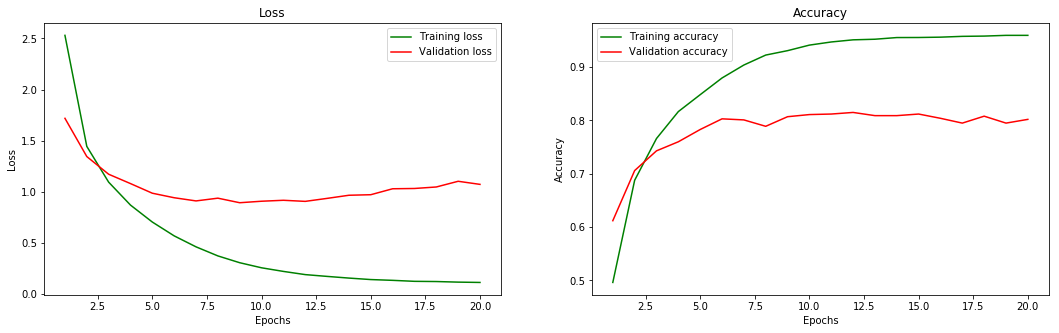

In [11]:
plot(history)

# Training and evaluating network from scratch

In [13]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/9
8982/8982 [==============================] - 1s - loss: 2.4464 - acc: 0.5389     
Epoch 2/9
8982/8982 [==============================] - 1s - loss: 1.3083 - acc: 0.7257     
Epoch 3/9
8982/8982 [==============================] - 1s - loss: 0.9635 - acc: 0.8002     
Epoch 4/9
8982/8982 [==============================] - 1s - loss: 0.7543 - acc: 0.8455     
Epoch 5/9
8982/8982 [==============================] - 1s - loss: 0.5942 - acc: 0.8790     
Epoch 6/9
8982/8982 [==============================] - 1s - loss: 0.4755 - acc: 0.9029     
Epoch 7/9
8982/8982 [==============================] - 1s - loss: 0.3832 - acc: 0.9216     
Epoch 8/9
8982/8982 [==============================] - 1s - loss: 0.3132 - acc: 0.9321     
Epoch 9/9
2080/2246 [==========================>...] - ETA: 0s[0.93764722697562863, 0.80053428322315645]


In [40]:
y_out = model.predict(x_test[0].reshape(1, 10000))[0]
print( len(y_out), np.min(y_out), np.max(y_out), np.sum(y_out) )
predicted_label = np.argmax(y_out)
actual_label = np.argmax(y_test[0])
print(predicted_label, actual_label)

46 2.26344e-06 0.928119 1.0
3 3


# A purely random classifier

In [29]:
random_labels = np.random.randint(46, size=len(test_labels))
random_accuracy = np.mean(test_labels == random_labels)
random_accuracy

0.023152270703472842

In [30]:
# This lines up with the theoritical probability of randomly selecting the correct class out of 46 classes
1/46

0.021739130434782608